In [31]:
import os
import sys
sys.path.insert(0,'./tools/')

import numpy as np
import xarray as xr

import pygmt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['contour.negative_linestyle']= 'solid'
import cmocean

In [32]:
from tools.config import OPSAREA, MAPEXTENT
from maps import *

In [26]:
# figure settings
figdir  = 'img/'
filename = 'SMODE_OperationsArea'
extension = ['png','pdf']
figproperties = dict(dpi=200,bbox_inches='tight')

### [pygmt](https://www.pygmt.org/v0.2.1/index.html): postscript GMT figure

Somewhat cryptic syntax but gorgeous maps. Requires GMT 6 in addition to pygmt.

In [27]:
# Settings
topo_data = '@earth_relief_30s'
proj = 'M6i'

In [ ]:
# Make the figure
fig = pygmt.Figure()

# High-res topography
pygmt.makecpt(
    cmap='bathy',
    series='-7010/-10/10',
    continuous=True
)

fig.grdimage(
    grid=topo_data,
    region=MAPEXTENT,
    projection=proj,
    shading=True,
    frame="ag"
    )


fig.grdcontour(
    grid=topo_data,
    interval=100,
    annotation="100+f6p",
    limit="-210/-10",
    pen="a0.15p",
    )

fig.grdcontour(
    grid=topo_data,
    interval=1000,
    annotation="1000+f6p",
    limit="-5000/-1000",
    pen="a0.15p",
    )


# Operations area
fig.plot(
    x=OPSAREA['longitude'],
    y=OPSAREA['latitude'],
    color='gray30@40',
    pen='3p,black',
    )

# Coast
fig.coast(
    shorelines=True,
    resolution='f',land='black')

# Legends and text
fig.text(
    x=[-123.85],
    y=[37.2],
    text='S-MODE Operations Area',  
    font='11p,Helvetica-Bold,white',
    angle=27,
    )

fig.show()

# To save in extensions other than ps, eps or pdf, you will need psconvet 
# installed
# [fig.savefig(os.path.join(figdir,filename+'_gmt.'+ext),
#              **figproperties) 
#              for ext in extension]
fig.savefig(os.path.join(figdir,filename+'_gmt.pdf'))

In [19]:
# !open -a Preview img/SMODE_OperationsArea_gmt.pdf  # this only works on the Mac

### [cartopy](https://scitools.org.uk/cartopy/docs/latest/installing.html)
A bit more intuitive (but clunky) syntax and decent-looking maps. Maps could be beautified, but that takes a lot of work.

The old NaturalEarth server is broken (9/22/2021). Features may have to manually downloaded and unzipped (see https://github.com/SciTools/cartopy/issues/1849).

In [20]:
# Get slice of ETOPO1 data from WHOI's GEOPORT thredds
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/etopo1_bed_g2'
bathy = xr.open_dataset(url)
bathy = bathy.sel(lon=slice(MAPEXTENT[0],MAPEXTENT[1]),
                  lat=slice(MAPEXTENT[2],MAPEXTENT[3])
)

In [21]:
projection = ccrs.PlateCarree(central_longitude=(MAPEXTENT[0]+MAPEXTENT[1])/2)
map_axes = (GeoAxes,{'map_projection':projection})

[None, None]

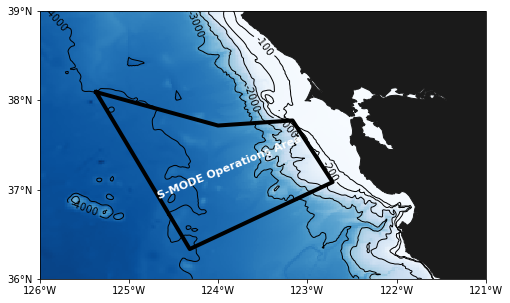

In [35]:
fig = plt.figure(figsize=(8,7))

ax = fig.add_subplot(111, projection=projection)     

ax.set_extent(MAPEXTENT)

# Topography
plot_topography(ax, colors=True,
                transform=ccrs.PlateCarree()
)

# Map properties (continent, labels, grid)
plot_map_properties(ax,transform=ccrs.PlateCarree())

# SMODE area
plot_operations_area(ax=ax,
                     transform=ccrs.PlateCarree(),
                     add_label=True
)

# Save figure
[fig.savefig(os.path.join(figdir,filename+'_cartopy.'+ext),
             **figproperties) 
            for ext in extension]